# informed algorithms : A*

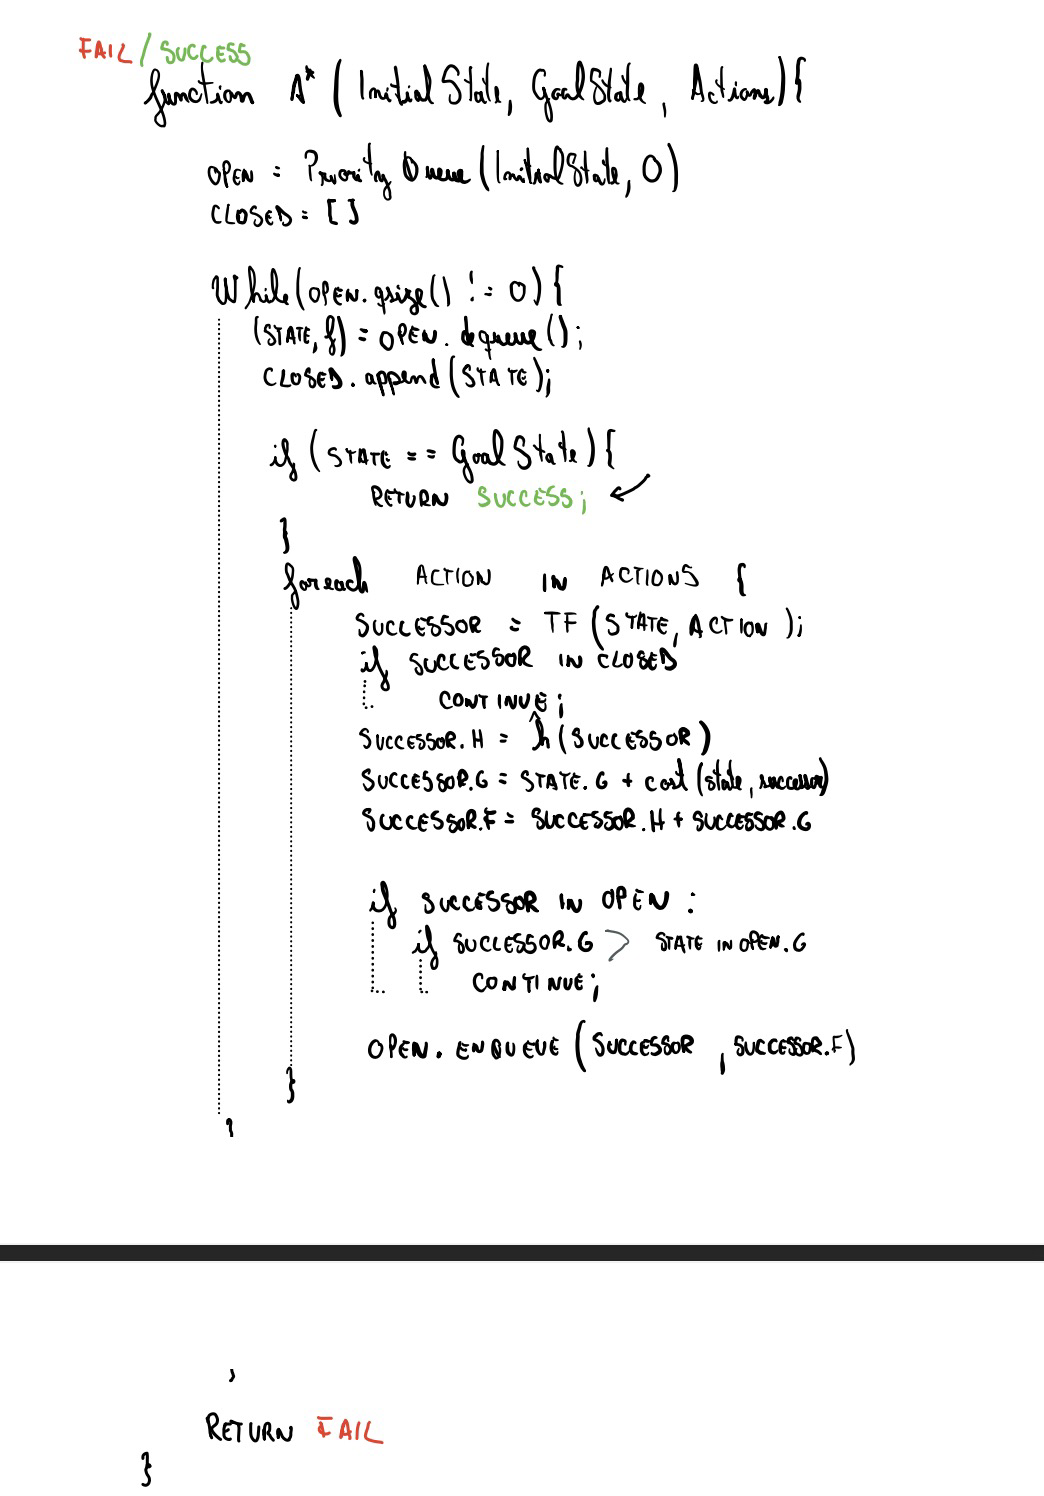

In [1]:
def best_first_graph_search(problem, f):
    f = memoize(f, 'f')
    node = Node(problem.initial)
    if problem.goal_test(node.state):
        return node
    frontier = PriorityQueue(min, f)
    frontier.append(node)
    explored = set()
    while frontier:
        node = frontier.pop()
        if problem.goal_test(node.state):
            return node
        explored.add(node.state)
        for child in node.expand(problem):
            if child.state not in explored and child not in frontier:
                frontier.append(child)
            elif child in frontier:
                incumbent = frontier[child]
                if f(child) < f(incumbent):
                    del frontier[incumbent]
                    frontier.append(child)
    return None

In [2]:
def astar_search(problem, h=None):
    """A* search is best-first graph search with f(n) = g(n)+h(n).
    You need to specify the h function when you call astar_search, or
    else in your Problem subclass."""
    h = memoize(h or problem.h, 'h')
    return best_first_graph_search(problem, lambda n: n.path_cost + h(n))

In [ ]:
    def a_star_search(self, start, goal):
        found, fringe, visited, came_from, cost_so_far = False, [(self.huristics[start], start)], set([start]), {start: None}, {start: 0}
        print('{:11s} | {}'.format('Expand Node', 'Fringe'))
        print('--------------------')
        print('{:11s} | {}'.format('-', str(fringe[0])))
        while not found and len(fringe):
            _, current = heappop(fringe)
            print('{:11s}'.format(current), end=' | ')
            if current == goal: found = True; break
            for node in self.neighbors(current):
                new_cost = cost_so_far[current] + self.cost(current, node)
                if node not in visited or cost_so_far[node] > new_cost:
                    visited.add(node); came_from[node] = current; cost_so_far[node] = new_cost
                    heappush(fringe, (new_cost + self.huristics[node], node))
            print(', '.join([str(n) for n in fringe]))
        if found: print(); return came_from, cost_so_far[goal]
        else: print('No path from {} to {}'.format(start, goal)); return None, inf
